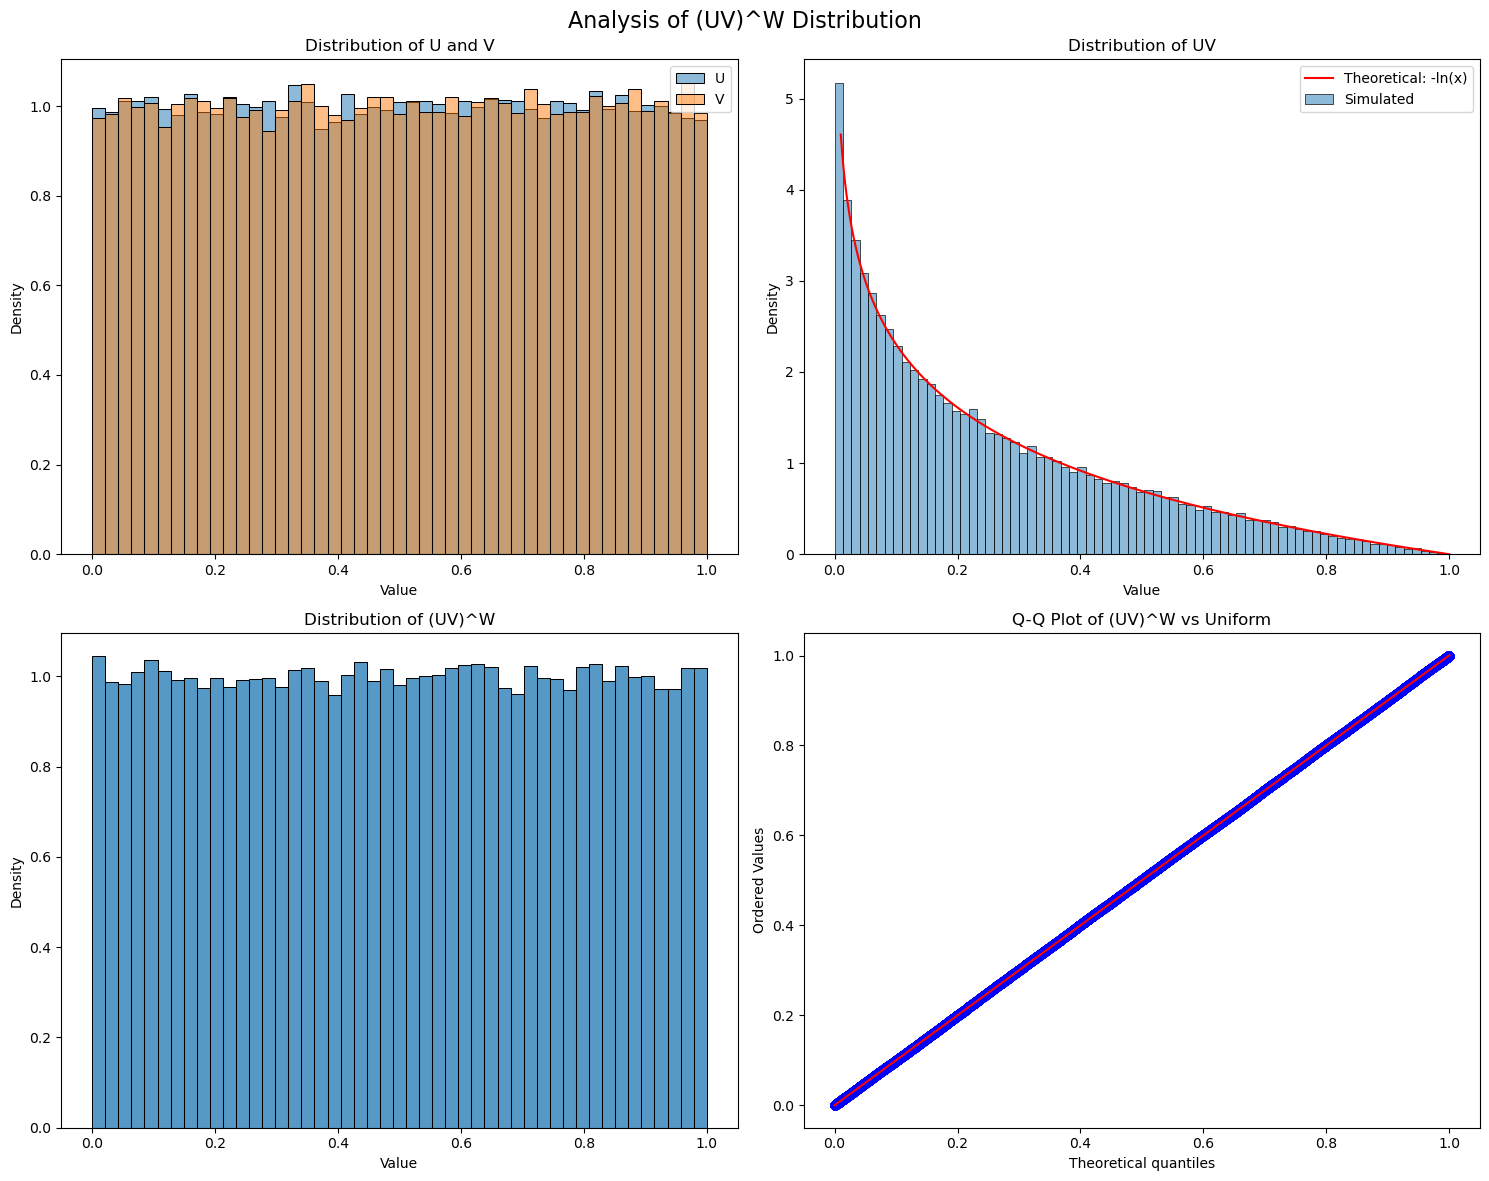


Summary Statistics:
UV:
  Mean: 0.2503
  Median: 0.1866
  Std Dev: 0.2205

(UV)^W:
  Mean: 0.5001
  Median: 0.5009
  Std Dev: 0.2889

Theoretical vs Empirical Comparison for UV:
Theoretical mean: 0.2500
Empirical mean: 0.2503
Theoretical standard deviation: 0.2357
Empirical standard deviation: 0.2205


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

def generate_samples(n_samples=100000):
    """
    Generate samples for U, V, and W random variables.
    Each is uniformly distributed on [0,1].
    
    Args:
        n_samples (int): Number of samples to generate
        
    Returns:
        tuple: Arrays containing samples of U, V, and W
    """
    U = np.random.uniform(0, 1, n_samples)
    V = np.random.uniform(0, 1, n_samples)
    W = np.random.uniform(0, 1, n_samples)
    return U, V, W

def theoretical_pdf(x):
    """
    Calculate the theoretical PDF for the product of two uniform random variables.
    
    Args:
        x (array-like): Points at which to evaluate the PDF
        
    Returns:
        array-like: PDF values at the given points
    """
    return -np.log(x)

def plot_distributions(U, V, W):
    """
    Create a comprehensive visualization of the distributions.
    
    Args:
        U, V, W (array-like): Sample arrays for the random variables
    """
    # Calculate derived quantities
    UV = U * V
    UVW = np.power(UV, W)
    
    # Create figure with subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Analysis of (UV)^W Distribution', fontsize=16)
    
    # Plot 1: Distribution of U and V (should be uniform)
    sns.histplot(data=U, stat='density', label='U', ax=ax1, alpha=0.5)
    sns.histplot(data=V, stat='density', label='V', ax=ax1, alpha=0.5)
    ax1.set_title('Distribution of U and V')
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Density')
    ax1.legend()
    
    # Plot 2: Distribution of UV with theoretical curve
    sns.histplot(data=UV, stat='density', label='Simulated', ax=ax2, alpha=0.5)
    x = np.linspace(0.01, 1, 1000)  # Avoid x=0 due to log
    ax2.plot(x, theoretical_pdf(x), 'r-', label='Theoretical: -ln(x)')
    ax2.set_title('Distribution of UV')
    ax2.set_xlabel('Value')
    ax2.set_ylabel('Density')
    ax2.legend()
    
    # Plot 3: Distribution of (UV)^W
    sns.histplot(data=UVW, stat='density', ax=ax3)
    ax3.set_title('Distribution of (UV)^W')
    ax3.set_xlabel('Value')
    ax3.set_ylabel('Density')
    
    # Plot 4: Q-Q plot of (UV)^W
    stats.probplot(UVW, dist="uniform", plot=ax4)
    ax4.set_title('Q-Q Plot of (UV)^W vs Uniform')
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nSummary Statistics:")
    print("UV:")
    print(f"  Mean: {np.mean(UV):.4f}")
    print(f"  Median: {np.median(UV):.4f}")
    print(f"  Std Dev: {np.std(UV):.4f}")
    print("\n(UV)^W:")
    print(f"  Mean: {np.mean(UVW):.4f}")
    print(f"  Median: {np.median(UVW):.4f}")
    print(f"  Std Dev: {np.std(UVW):.4f}")

def main():
    """
    Main function to run the analysis and create visualizations.
    """
    # Generate samples
    U, V, W = generate_samples()
    
    # Create plots and print statistics
    plot_distributions(U, V, W)
    
    # Additional analysis: check if our implementation matches theory
    UV = U * V
    theoretical_mean = 1/4  # Theoretical mean of UV
    theoretical_variance = 1/18  # Theoretical variance of UV
    
    print("\nTheoretical vs Empirical Comparison for UV:")
    print(f"Theoretical mean: {theoretical_mean:.4f}")
    print(f"Empirical mean: {np.mean(UV):.4f}")
    print(f"Theoretical standard deviation: {np.sqrt(theoretical_variance):.4f}")
    print(f"Empirical standard deviation: {np.std(UV):.4f}")

if __name__ == "__main__":
    main()